In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [4]:
from sklearn.datasets import load_boston

In [5]:
boston=load_boston()

In [6]:
type(boston)

sklearn.utils.Bunch

In [7]:
boston #data 
       #target

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
X=boston["data"]
y=boston["target"]

In [9]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
print(boston["DESCR"]) #it will tell you about Dexcription

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
X.shape

(506, 13)

In [12]:
y.shape

(506,)

In [13]:
df=pd.DataFrame(X,columns=boston.feature_names)

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Preprocess - Standardization

In [15]:
mu = X.mean(axis=0)
sig = X.std(axis=0)

In [16]:
# std => 1 , mean=> 0
X = (X - mu)/sig


In [17]:
#now its standardize 
X.mean()

-1.1147462804871136e-15

In [18]:
X.std()

0.9999999999999994

In [19]:
X = np.hstack( (np.ones((X.shape[0],1)) , X)  )
#HERE WE ARE just making a zero array of size of X[0] and stacking horizontally with X itself
#this is adding Xnot 1

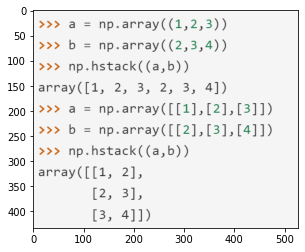

In [20]:
img=plt.imread("./doubt1.png")
plt.imshow(img)

In [21]:
# import cv2

In [22]:
# img  = cv2.imread("./doubt1.png")
# rgb_img=img[:,:,[2,1,0]]
# plt.imshow(rgb_img)

In [23]:
X.shape

(506, 14)

In [24]:
X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [25]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [26]:
y = y.reshape(y.shape[0], 1)


In [27]:
y.shape

(506, 1)

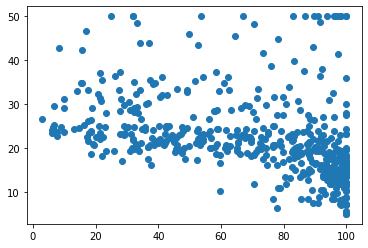

In [28]:
plt.scatter(df['AGE'],y) #this can not good factor

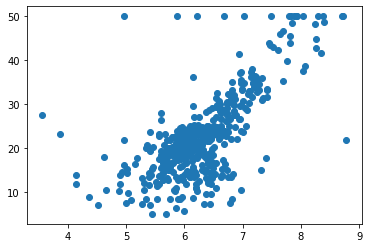

In [29]:
 plt.scatter(df['RM'],y) #this can be a good factor
#good pattern as  yincrease RM too increase

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Multivariate Linear Reg


In [32]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return np.dot(X,theta)

In [33]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1) shape 
    err = np.mean( (y_hat - y )**2 ) 
    return err

In [34]:
def gradient(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    return:
        scalar value = loss value
    """
    

    
    y_hat = hypothesis(X, theta)
    #     print(y_hat.shape ) for just checking if anything wrong in function

    grad = np.dot( X.T , (y_hat - y) )
#     print(grad.shape ) for just checking if anything wrong in function
    return grad/X.shape[0]

In [35]:
def gradient_descent(X, y, lr =0.1, max_itr = 100):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        #print(grad)  #we can use this for checking and all we can print anything for rechecking
        # Updation Rule
        #same as in linear regression
        theta = theta - lr*grad #here we have vectors of same shape so we can perform operation
        
    return (theta, error_list)

In [36]:
st = time.time()
opt_theta, error_list = gradient_descent(X_train, y_train)
end = time.time()
print("total time taken ", end-st)
#for seeing time  but first import time

total time taken  0.0069997310638427734


In [37]:
opt_theta.shape

(14, 1)

In [38]:
opt_theta

array([[22.4690143 ],
       [-0.83783369],
       [ 0.401608  ],
       [-0.08569646],
       [ 0.74921873],
       [-1.52874482],
       [ 3.28943024],
       [-0.21421601],
       [-2.59764585],
       [ 1.17831434],
       [-0.70973193],
       [-1.87981408],
       [ 1.13808083],
       [-3.57408554]])

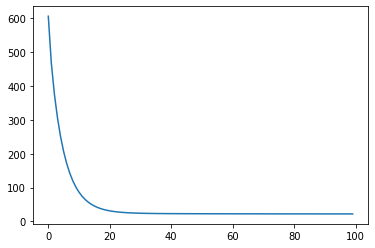

In [39]:
plt.plot(error_list) #error reduce more increasing the learning rate

In [40]:
y_pred = hypothesis(X_test, opt_theta)


In [41]:
def r2_score(Y, Y_):
    """
    calculate r2 score on y_hat and Y
    """
    num = np.sum((Y - Y_)**2)
    denom = np.sum( (Y - Y.mean() )**2 )
    
    score = 1 - (num/denom)
    
    return score

In [42]:
r2_score(y_test, y_pred)


0.6536437704407978

# Linear Regression from from sklearn

In [43]:
# import 
from sklearn.linear_model import LinearRegression


# object
model = LinearRegression()

In [44]:
# training - > fit

model.fit(X_train, y_train)

LinearRegression()

In [45]:
model.score(X_test, y_test)
#it tells R2 score 

0.6687594935356316

In [46]:
model.score(X_train, y_train)


0.7508856358979673

In [47]:
model.intercept_
# theta0

array([22.48526824])

In [48]:
model.coef_
#all the theta 

array([[ 0.        , -0.97149423,  0.70155562,  0.27675212,  0.70653152,
        -1.99143043,  3.11571836, -0.17706021, -3.04577065,  2.28278471,
        -1.79260468, -1.97995351,  1.12649864, -3.62814937]])

In [49]:
opt_theta #we can see are theta valis same by both 

array([[22.4690143 ],
       [-0.83783369],
       [ 0.401608  ],
       [-0.08569646],
       [ 0.74921873],
       [-1.52874482],
       [ 3.28943024],
       [-0.21421601],
       [-2.59764585],
       [ 1.17831434],
       [-0.70973193],
       [-1.87981408],
       [ 1.13808083],
       [-3.57408554]])

In [50]:
#np.linalg.pinv() moore penrose pseduo inverse
#np.linalg.inv()

In [54]:
model.predict(X_test)

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992],
       [23.25442929],
       [17.66253818],
       [14.34119   ],
       [23.01320703],
       [20.63245597],
       [24.90850512],
       [18.63883645],
       [-6.08842184],
       [21.75834668],
       [19.23922576],
       [26.19319733],
       [20.64773313],
       [ 5.79472718],
       [40.50033966],
       [17.61289074],
       [27.24909479],
       [30.06625441],
       [11.34179277],
       [24.16077616],
       [17.86058499],
       [15.83609765],
       [22.78148106],
       [14.57704449],
       [22.43626052],
       [19.19631835],
       [22.43383455],
       [25.21979081],
       [25.93909562],
       [17.70162434],
       [16.76911711],
       [16.95125411],
       [31.23340153],
       [20.13246729],
       [23.76579011],
       [24.6322925 ],
       [13.94204955],
       [32.25576301],
       [42.67251161],
       [17.32745046],
       [27.27618614],
       [16